In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = np.loadtxt('spacings/eigen_space1000.txt')

(array([5.100e+02, 2.184e+03, 2.865e+03, 2.088e+03, 1.088e+03, 5.010e+02,
        2.050e+02, 1.080e+02, 7.700e+01, 4.500e+01, 3.000e+01, 2.100e+01,
        1.500e+01, 5.000e+00, 8.000e+00, 1.100e+01, 1.000e+00, 1.000e+00,
        6.000e+00, 2.000e+00, 6.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 5.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([0.00388507, 0.03654359, 0.06920211, 0.10186063, 0.13451914,
        0.16717766, 0.19983618, 0.2324947 , 0.26515321, 0.29781173,
        0.33047025, 0.36312877, 0.39578728, 0.4284458 , 0.46110432,
        0.49376284, 0.52642136, 0.55907987, 0.59173839, 0.62439691,
        0.65705543, 0.68971394, 0.72237246, 0.75503098, 0.7876895 ,
        0.82034801, 0.85300653, 0.88566505, 0.91832357, 0.95098209,
        0.9836406 ]),
 <BarContainer object of 30 artists>)

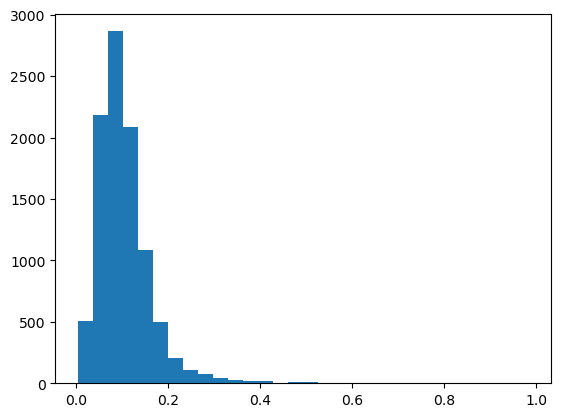

In [10]:
plt.hist(x=data[data<1].flatten(), bins=30)

In [5]:
data[data>200]

array([ 242.30219731, 1014.79101737,  242.81344268, 1016.98837153,
        233.7445249 ,  990.08781121,  240.07427565, 1011.19841195,
        235.04292669,  993.98762868,  238.24197907, 1007.25336723,
        238.71730635, 1011.18779001,  246.41779206, 1039.67081662,
        239.76128045, 1014.324269  ,  239.43344534, 1009.39097444])